In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.isnull().value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age    Education  Urban  US   
False  False      False   False        False       False  False      False  False      False  False    400
dtype: int64

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.duplicated().value_counts()

False    400
dtype: int64

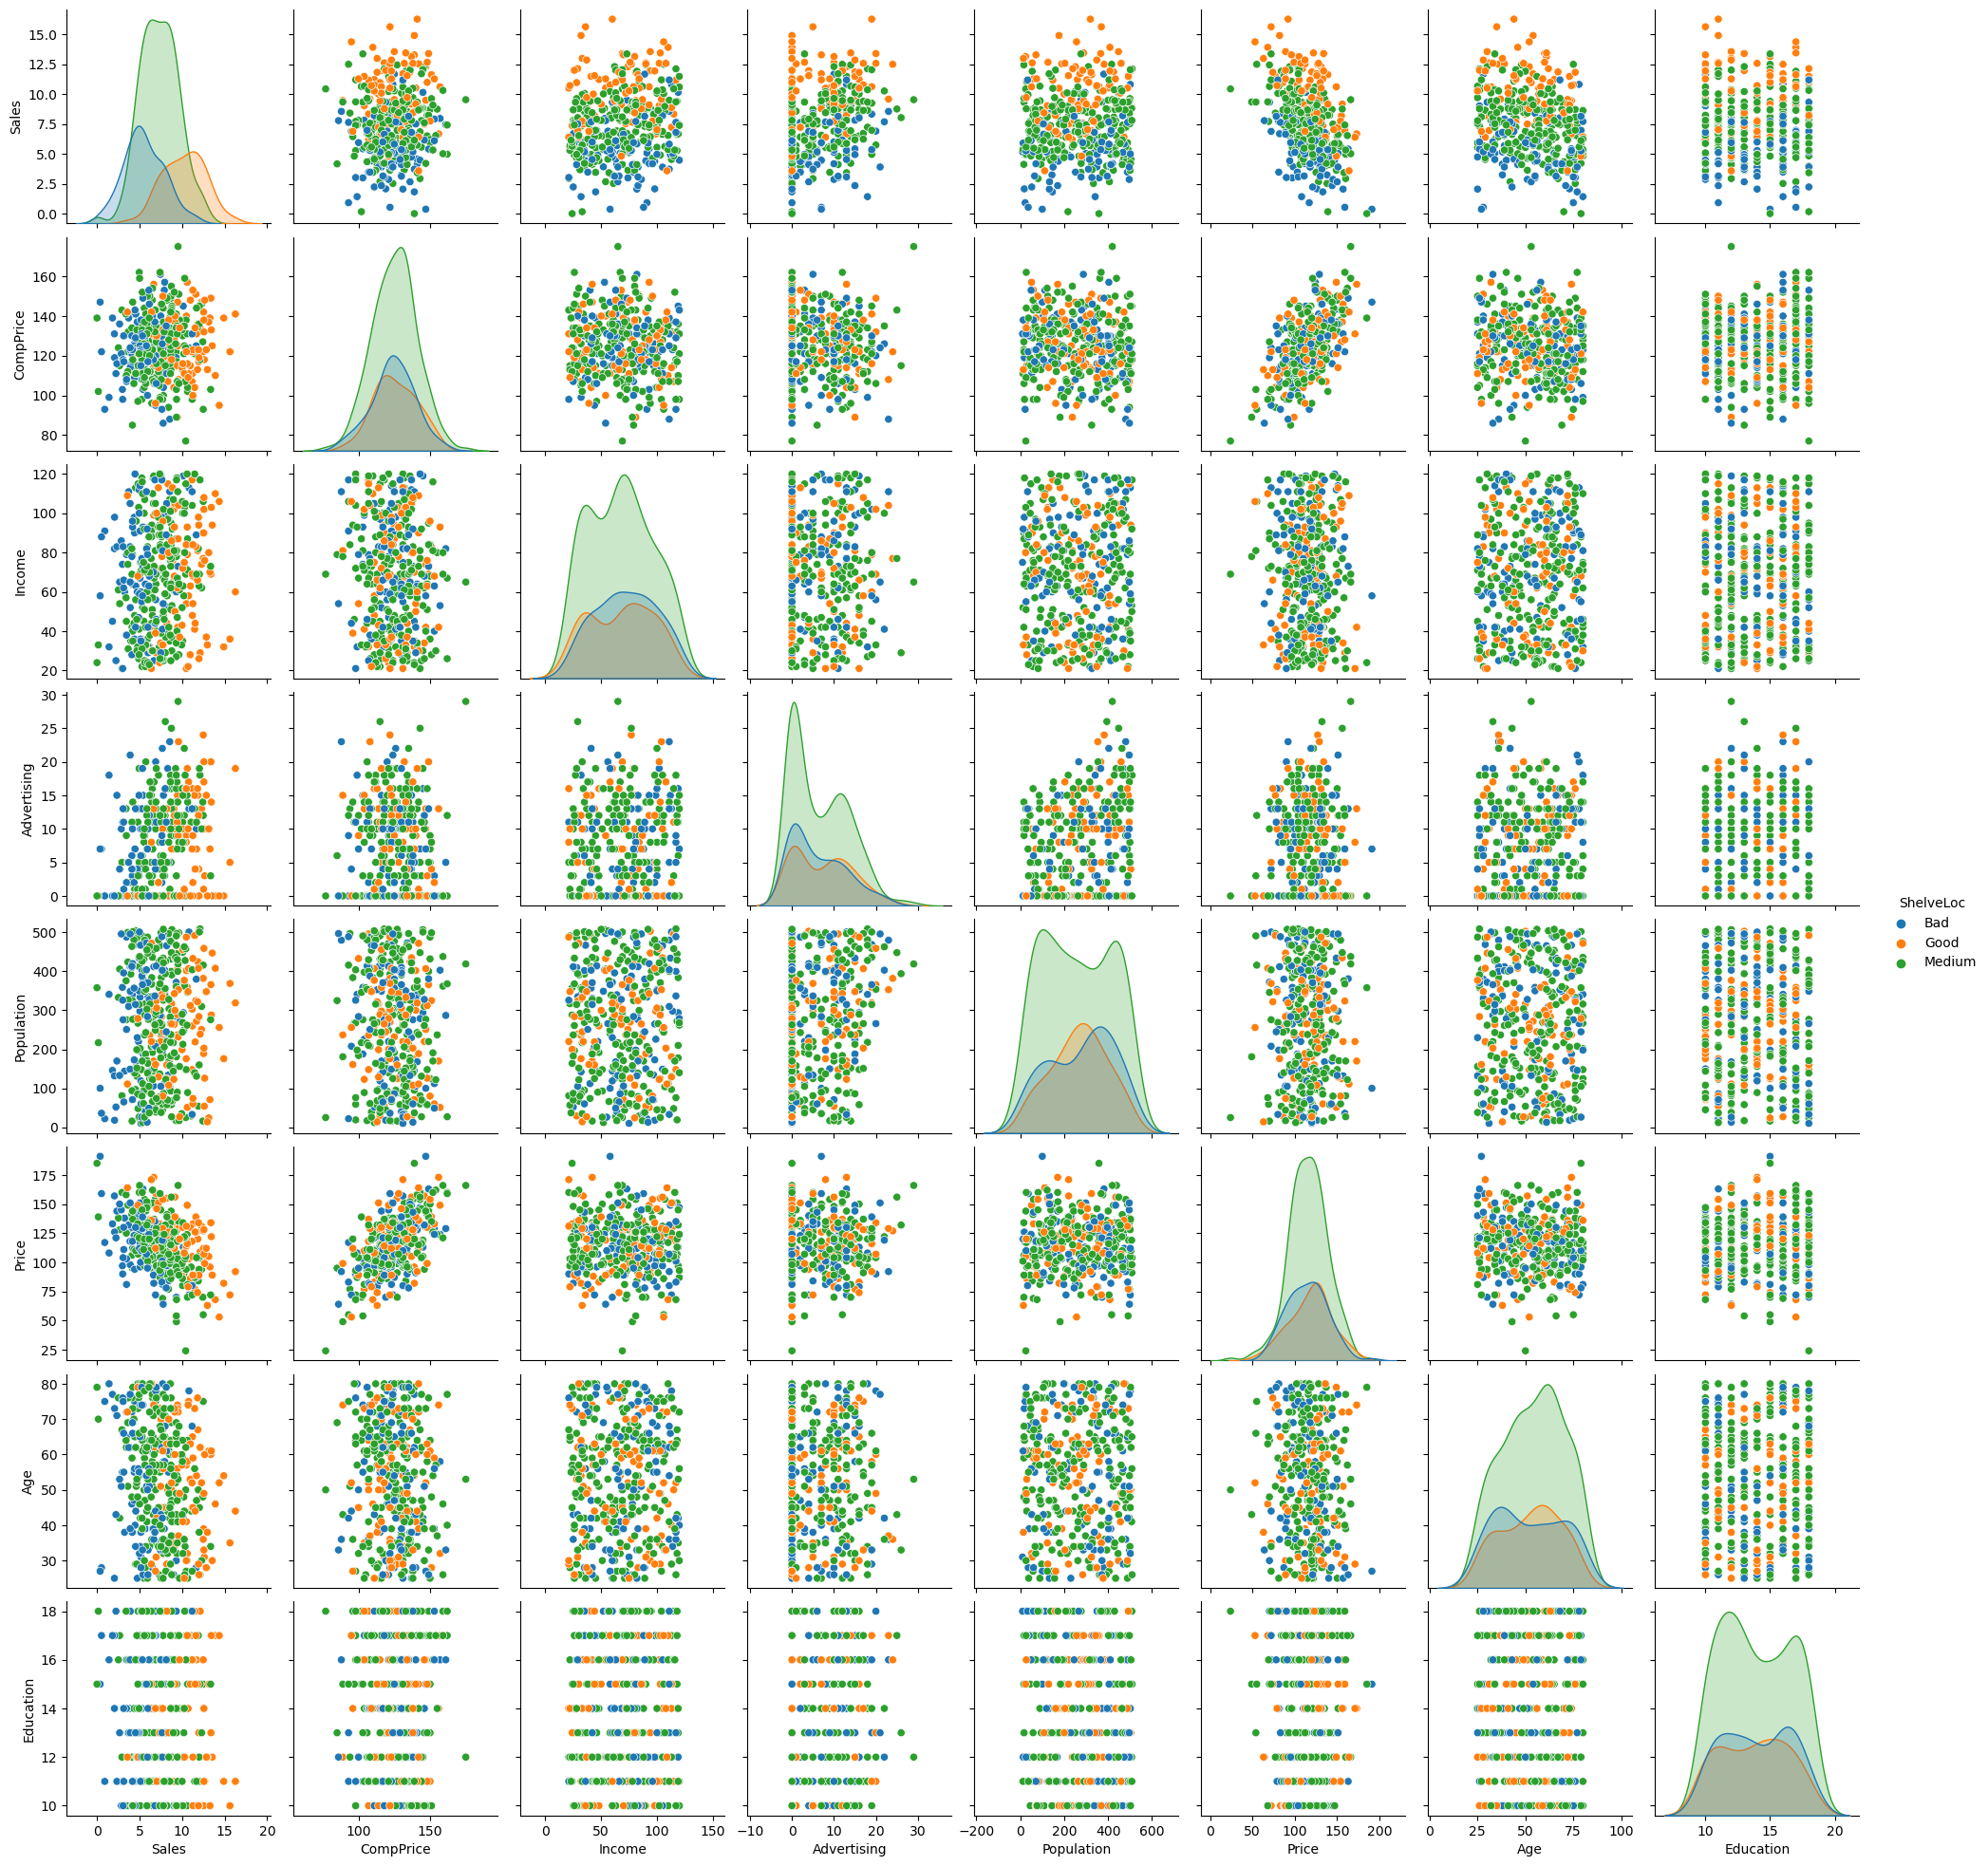

In [7]:
sns.pairplot(df,hue='ShelveLoc')

In [8]:
df=pd.get_dummies(df,columns=['US','Urban'],drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,1,0
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   US_Yes       400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(2)
memory usage: 29.0+ KB


In [10]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [11]:
pd.value_counts(df.ShelveLoc)

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [12]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1, 'Medium':2,'Bad': 3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   US_Yes       400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
dtypes: float64(1), int64(8), uint8(2)
memory usage: 29.0 KB


In [14]:
x=df.iloc[:,:-5]
y=df['ShelveLoc']
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

# Decision Tree Classification Using Entropy

In [16]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.60      0.40      0.48        15
           2       0.58      0.67      0.62        45
           3       0.33      0.30      0.32        20

    accuracy                           0.53        80
   macro avg       0.50      0.46      0.47        80
weighted avg       0.52      0.53      0.52        80



In [17]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 0.684375
Testing Accuracy: 0.525


In [18]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

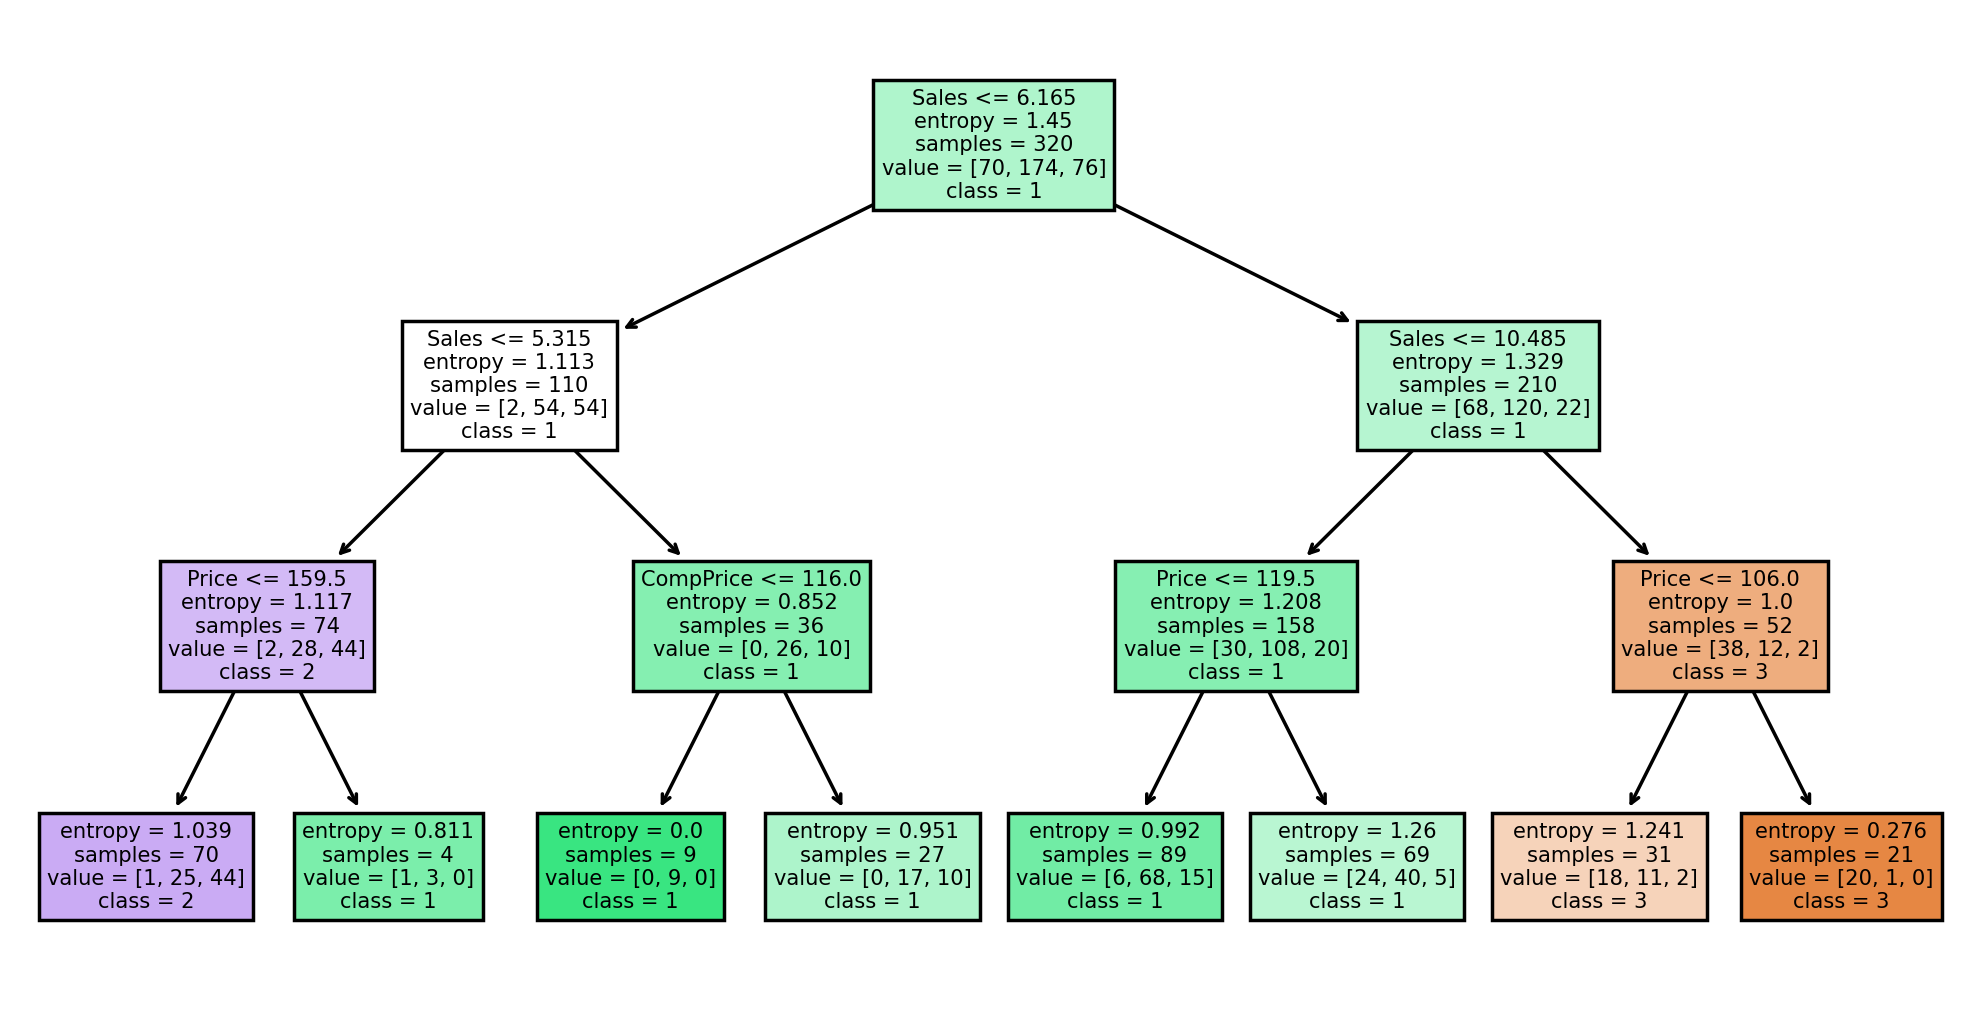

In [19]:
tree.plot_tree(dt,feature_names=x.columns,class_names=df['ShelveLoc'].unique().astype(str),filled=True)
plt.show()

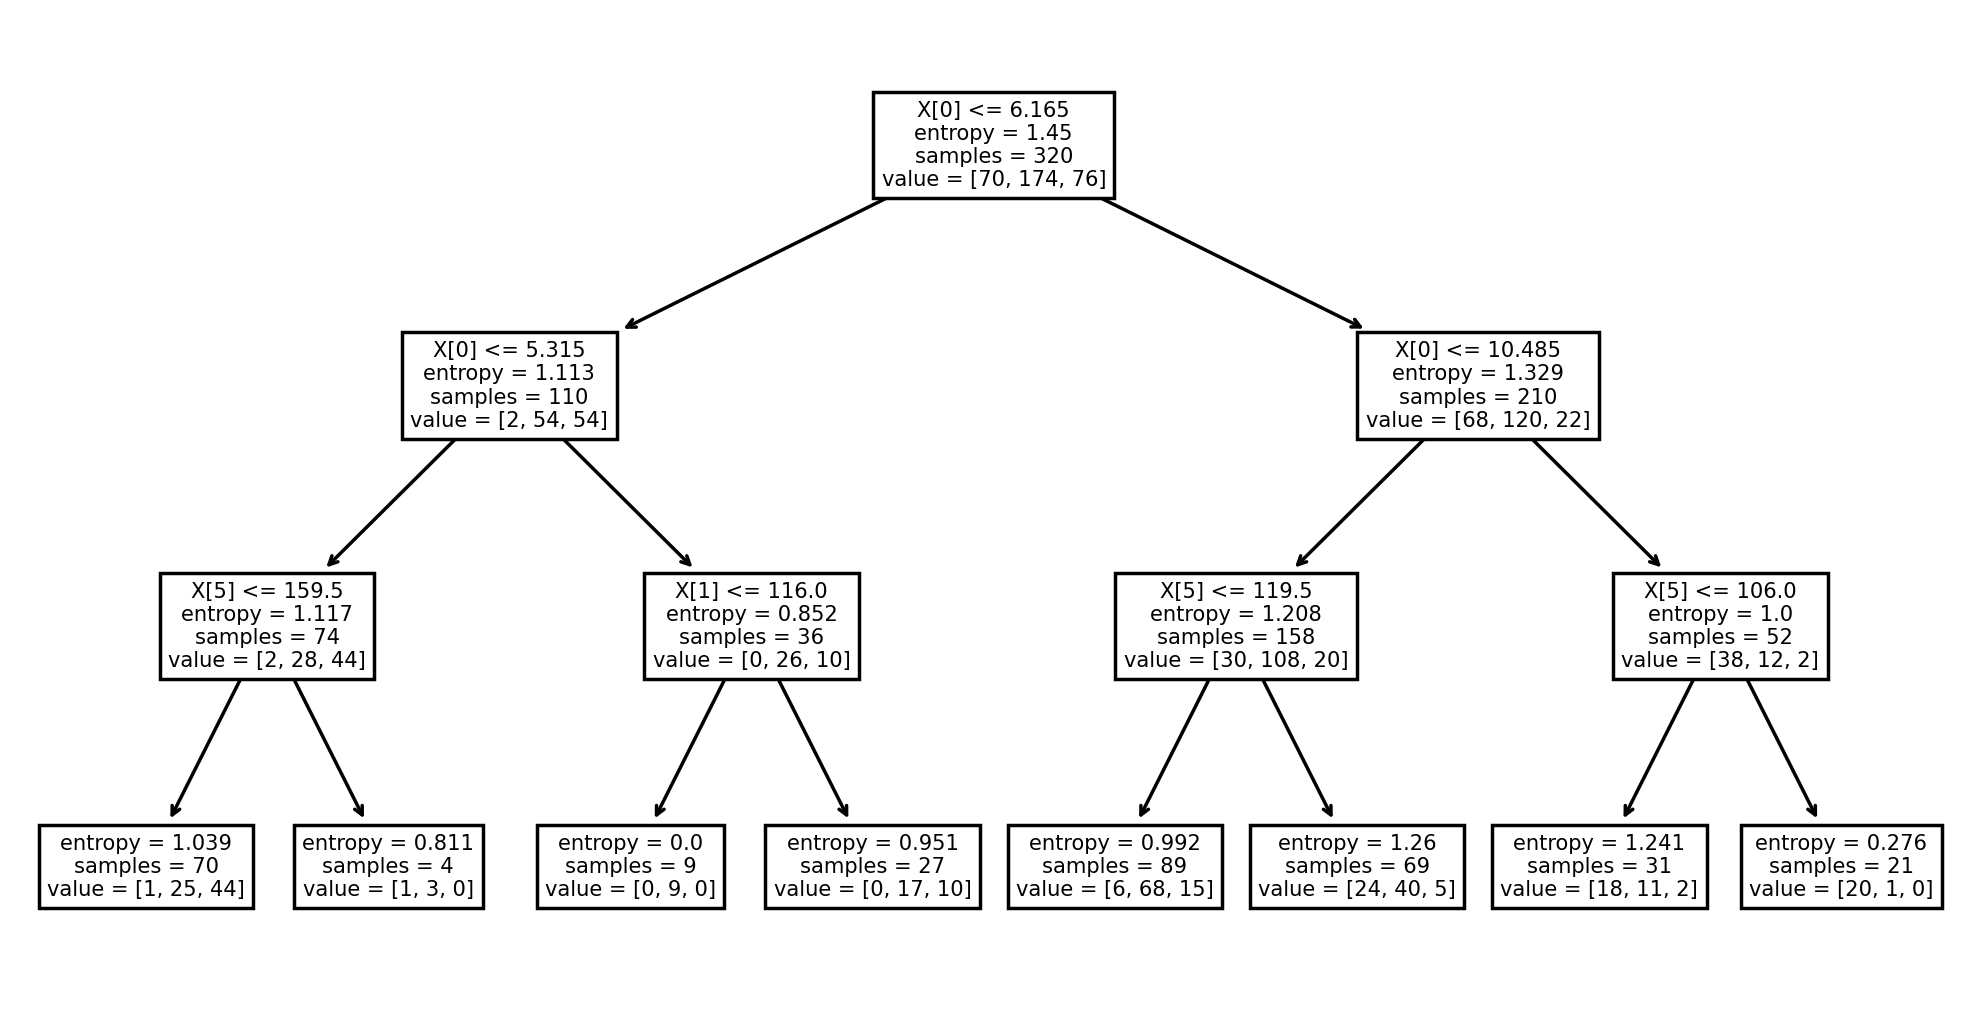

In [20]:
tree.plot_tree(dt)
plt.show()

In [21]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(xtrain,ytrain)
ypred_gini=dt_gini.predict(xtest)
print(classification_report(ytest,ypred_gini))

              precision    recall  f1-score   support

           1       0.50      0.47      0.48        15
           2       0.58      0.58      0.58        45
           3       0.33      0.35      0.34        20

    accuracy                           0.50        80
   macro avg       0.47      0.46      0.47        80
weighted avg       0.50      0.50      0.50        80



# HyperPArameter Tunning

In [22]:
from sklearn.model_selection import GridSearchCV


In [23]:
dt=DecisionTreeClassifier()
params={
        'criterion':['gini','entropy'],
        'max_depth':[1,2,3,4,5],
        'splitter':['random','best']
       }
grid=GridSearchCV(dt,params)
grid.fit(xtrain,ytrain)
ypred_grid=grid.predict(xtest)
print(classification_report(ytest,ypred_grid))

              precision    recall  f1-score   support

           1       0.60      0.40      0.48        15
           2       0.58      0.64      0.61        45
           3       0.35      0.35      0.35        20

    accuracy                           0.53        80
   macro avg       0.51      0.46      0.48        80
weighted avg       0.53      0.53      0.52        80



In [24]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [25]:
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='best')
dt_gini.fit(xtrain,ytrain)
ypred_gini=dt_gini.predict(xtest)
print(classification_report(ytest,ypred_gini))
print(dt_gini.score(xtrain,ytrain))
print(dt_gini.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.60      0.40      0.48        15
           2       0.58      0.64      0.61        45
           3       0.35      0.35      0.35        20

    accuracy                           0.53        80
   macro avg       0.51      0.46      0.48        80
weighted avg       0.53      0.53      0.52        80

0.675
0.525


# Decision Tree REgression

In [48]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [49]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [55]:
dr=DecisionTreeRegressor()
dr.fit(xtrain,ytrain)
yp=dr.predict(xtest)
#print(classification_report(ytest,yp))
#print('Training Accuracy:',dr.score(xtrain,ytrain))
print('Testing Accuracy:',dr.score(xtest,ytest))




Testing Accuracy: 0.09149200683334524


In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(ytest,yp)

0.09149200683334524

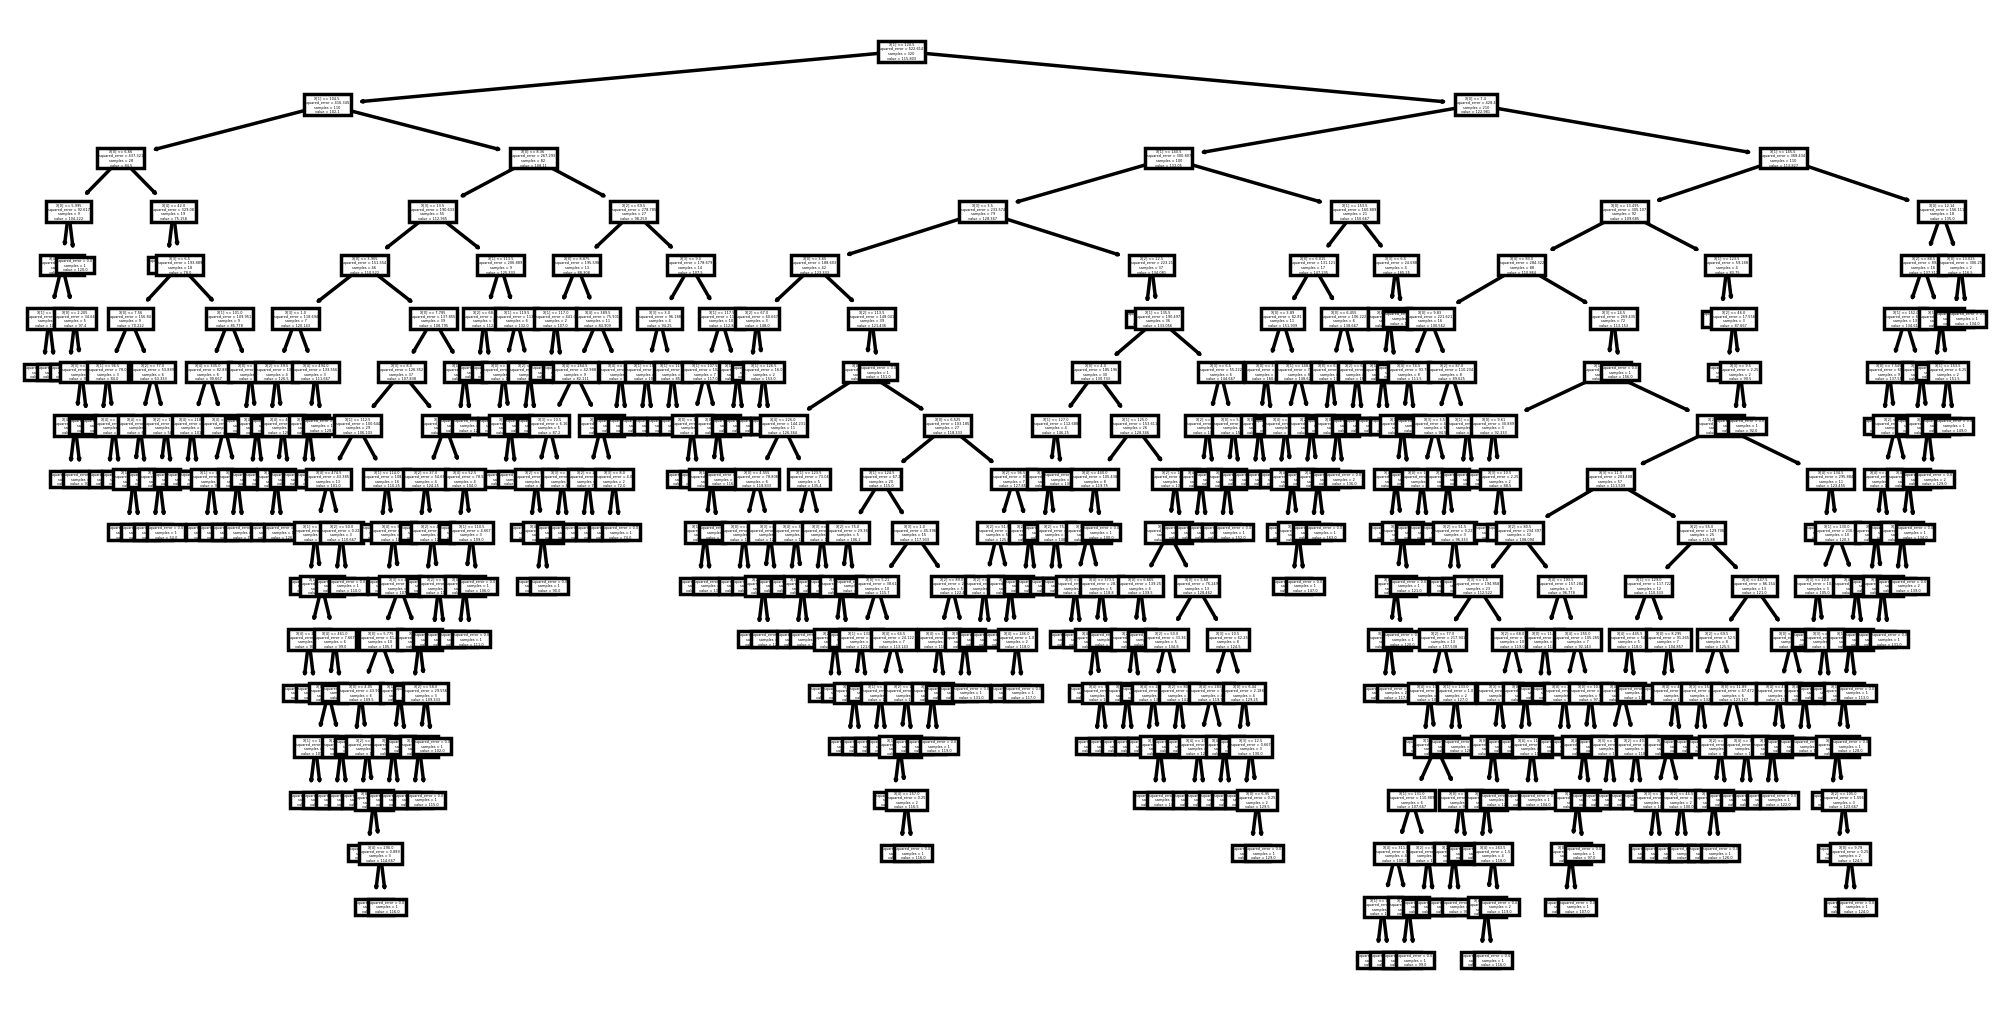

In [59]:
tree.plot_tree(dr)
plt.show()